In [8]:
import pandas as pd
Demographics=pd.read_csv('Demographics cleaned.csv')
Credit=pd.read_csv('Credit Bureau Cleaned.csv')


In [9]:
Demographics_credit=pd.merge(Demographics, Credit, how='outer', on='Application ID')

In [10]:
DC=Demographics_credit.dropna()
DC

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48.0,F,Married,2.0,40.0,Bachelor,SAL,Rented,113.0,...,2.0,0.0,0.0,0.0,0.0,1.0,2999395.0,4.0,0.0,0.0
1,432830445,31.0,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3078.0,5.0,0.0,0.0
2,941387308,32.0,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3004972.0,2.0,0.0,0.0
3,392161677,43.0,M,Married,1.0,53.0,Bachelor,SE,Rented,94.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3355373.0,4.0,1.0,0.0
4,182011211,35.0,F,Married,5.0,44.0,Professional,SAL,Rented,112.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3014283.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69711,171780611,25.0,M,Single,3.0,19.0,Professional,SE_PROF,Owned,15.0,...,4.0,1.0,2.0,2.0,6.0,1.0,2961065.0,3.0,1.0,0.0
69712,350623553,46.0,F,Married,3.0,43.0,Professional,SE,Rented,6.0,...,7.0,2.0,4.0,3.0,7.0,0.0,703567.0,7.0,0.0,1.0
69713,469441391,27.0,M,Married,2.0,30.0,Professional,SE_PROF,Rented,6.0,...,9.0,2.0,5.0,1.0,2.0,0.0,879324.0,8.0,0.0,1.0
69725,704812159,52.0,M,Married,3.0,4.5,Bachelor,SE,Rented,76.0,...,10.0,3.0,5.0,4.0,6.0,1.0,3475822.0,9.0,0.0,0.0


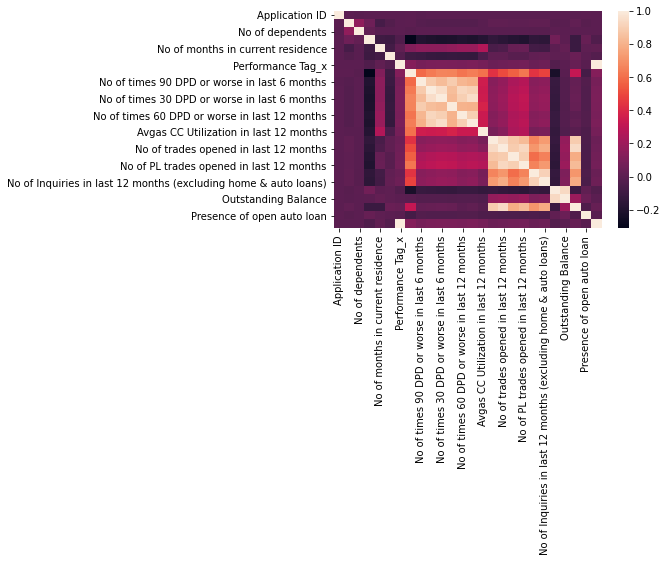

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
data = DC
df = pd.DataFrame(data)
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [21]:
print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Correlation Matrix
                                                    Application ID       Age  \
Application ID                                            1.000000  0.000195   
Age                                                       0.000195  1.000000   
No of dependents                                         -0.005326  0.165548   
Income                                                    0.001566  0.058452   
No of months in current residence                         0.000335 -0.067456   
No of months in current company                          -0.002914 -0.025041   
Performance Tag_x                                         0.001823 -0.002153   
No of times 90 DPD or worse in last 6 months             -0.004213 -0.016407   
No of times 60 DPD or worse in last 6 months             -0.000552 -0.019685   
No of times 30 DPD or worse in last 6 months             -0.000610 -0.020689   
No of times 90 DPD or worse in last 12 months            -0.001009 -0.020375   
No of times 60 DPD or

KeyError: ('No of PL trades opened in last 6 months', 'Education')

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:

from random import randint
TRAIN_SET_LIMIT = 1000
TRAIN_SET_COUNT = 100

TRAIN_INPUT = list()
TRAIN_OUTPUT = list()
for i in range(TRAIN_SET_COUNT):
    a = randint(0, TRAIN_SET_LIMIT)
    b = randint(0, TRAIN_SET_LIMIT)
    c = randint(0, TRAIN_SET_LIMIT)
    op = a + (2*b) + (3*c)
    TRAIN_INPUT.append([a, b, c])
    TRAIN_OUTPUT.append(op)

In [3]:
from sklearn.linear_model import LinearRegression

predictor = LinearRegression(n_jobs=-1)
predictor.fit(X=TRAIN_INPUT, y=TRAIN_OUTPUT)

LinearRegression(n_jobs=-1)